<a href="https://colab.research.google.com/github/lacastanop/se-alesys/blob/main/Parcial_2_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución Parcial 2 - Señales y Sistemas 2024-1
Juan José Cardona H. - Paulo Sergio Guzman Q. - Laura Sofía Castaño Pineda

##Pregunta #1

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t) = \lvert A \sin(2 \pi F_0 t) \rvert ^2 $, con $t \in [-\frac{1}{2 F_0},\frac{1}{2 F_0} ]$, con $A, F_0 \in \mathbb{R}^+$


---



###**Solución:**

El desarrollo de la solución para hallar el espectro de Fourier en su forma exponencial y trigonométrica, puede ser consultado en el siguiente enlace:

[Cálculos espectro de Fourier (Exp y Trig)](https://github.com/juacardonahe/NotebooksS_S/tree/main/Parciales)




---



## Pregunta #2
Realice las simulaciones respectivas para graficar el espectro de Fourier de la pregunta #1 (magnitud y fase como diagrama de Bode en decibelios), y presente el error relativo y la señal reconstruida para $N = \{ 1,2,...,50 \}$

###**Simulaciones:**

T= 0.01
wo= 628.3185307179587
Fo= 100.0


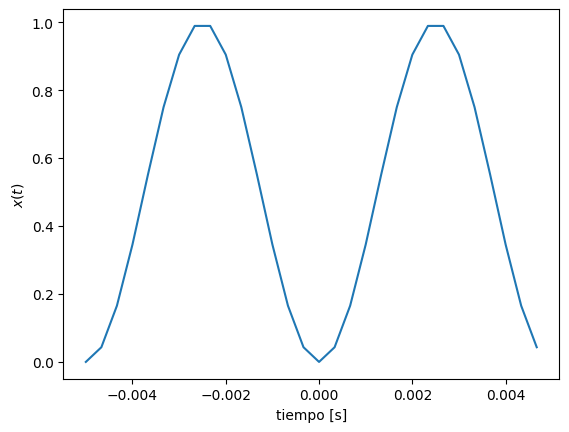

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#simulamos la señal de entrada
A = 1
Fo = 100

ti = -1/(2*Fo) #tiempo inicial
tf = 1/(2*Fo) #tiempo final
T = tf-ti
wo = 2*np.pi/T #frecuencia angular
Fo = wo/(2*np.pi) #frecuencia fundamental

print('T=',T)
print('wo=',wo)
print('Fo=',Fo)
Fs = 30*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
Nm = len(tv)#muestras en el tiempo
xo = (abs(A*np.sin(wo*tv)))**2 #señal de entrada
plt.plot(tv,xo) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

Dado que la señal presenta simetria **PAR**, es decir $\ x(t) = x(-t)$ su espectro de Fourier solo tendra componente $ \mathbb{R}$, de los cálculos presentados en el PDF se tiene que:

 $$\boxed{b_n = 0 \quad \forall \ n \in \{1,\dots,N\}}$$

Por lo tanto el espectro de Fourier en su forma trigonométrica es:

$$\boxed{a_n = \left\{\begin{align} 0 & \quad \forall \ n \setminus \{0, 2\}\\
\frac{A^2}{2} & \quad n = 0\\ - \frac{A^2}{2} & \quad n = 2\\
\end{align}\right.}$$

$$\boxed{x(t)= a_0 + \sum_{n=1}^N{a_n\cos(n\omega_0 t)} = a_0 + a_2 \cos(n\omega_0 t) =  \frac{A^2}{2} - \frac{A^2}{2} \cos(2 \cdot 2\pi F_0 t)}$$


Para el caso de la exponencial compleja se tiene que:

$$c_0 = a_0 = \frac{A^2}{2}$$

Y haciendo uso la igualdad entre los coeficientes $c_n \ $ y $\ a_n, \ b_n$, se obtiene lo siguiente:

$$c_n = \frac{a_n - j b_n}{2}$$

Por lo tanto:

$$\boxed{c_n = \left\{\begin{align}
- \frac{A^2}{4} & \quad n = -2\\
\frac{A^2}{2} & \quad n = 0\\
- \frac{A^2}{4} & \quad n = 2\\
0 & \quad \forall \ n \setminus \{-2,0,2\}
\end{align}\right.}$$

Por lo tanto el espectro de Fourier en su forma exponencial compleja es:

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n \omega_0 t}}}$$

$$x(t) = c_{-2}e^{-j2 \cdot 2\pi F_0t} + c_{0}e^{0} + c_{2}e^{j2\cdot 2\pi F_0t}$$

$$\boxed{x(t) = -\frac{A^2}{4} [\cos(2 \cdot 2\pi F_0 t) - j \sin(2 \cdot 2\pi F_0 t)] + \frac{A^2}{2} -\frac{A^2}{4} [\cos(2 \cdot 2\pi F_0 t) + j \sin(2 \cdot 2\pi F_0 t)]} $$


Teniendo las series definidas se procede a realizar las simulaciones respectivas para mostrar su magnitud, fase, error relativo y la señal reconstruida para $N = \{ 1,2,...,50 \}$



In [ ]:
#se presenta la simulación del espectro y la reconstrucción
#construir bases serie exponencial
N = 50 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = (A**2) / 2 # nivel dc C_0
Cn[N-2] = -(A**2) /4
Cn[N+2] = -(A**2) /4

####**Magnitud y fase en decibelios**

<ipython-input-5-9c8713e2af07>:18: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20*np.log10(abs(Cn)), 'r')#magnitud del espectro


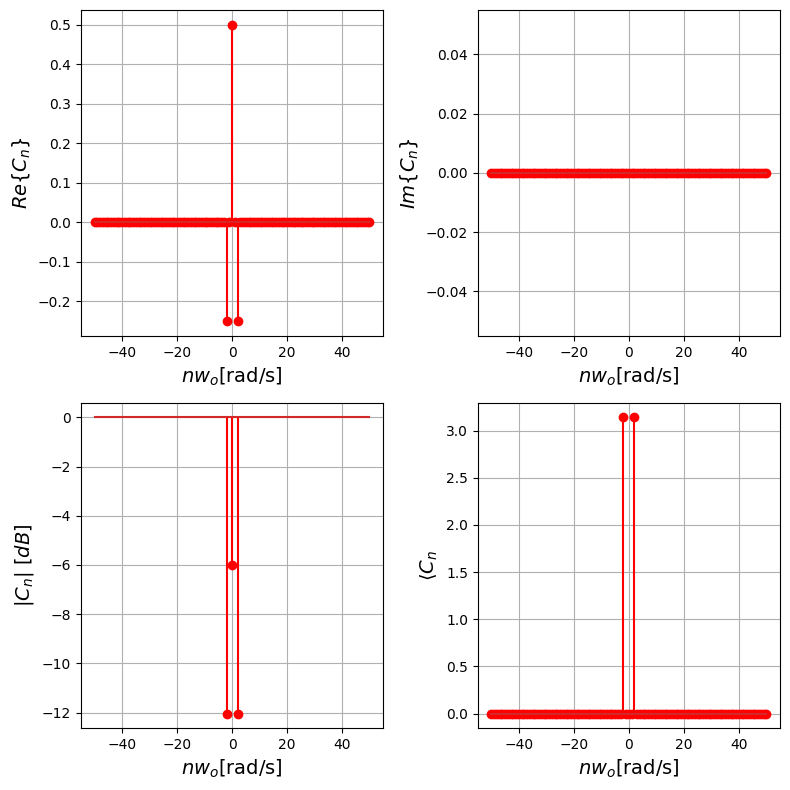

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, 20*np.log10(abs(Cn)), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n| \ [dB]$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

####**Error relativo y señal reconstruida para  $\ N = \{ 1,2,...,50 \}$**

Se requiere hallar la potencia de la señal para calcular el error relativo, el desarrollo de este calculo puede ser consultado en el PDF:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} 100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)100[\%]$$

Para el caso de la serie exponencial de Fourier $P_n=1$, por consiguiente:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right).
\end{equation}

La potencia de la señal obtenida en los cálculos fue:
$$\boxed{\bar{P_x} =  \frac{3A^4}{8}}$$

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


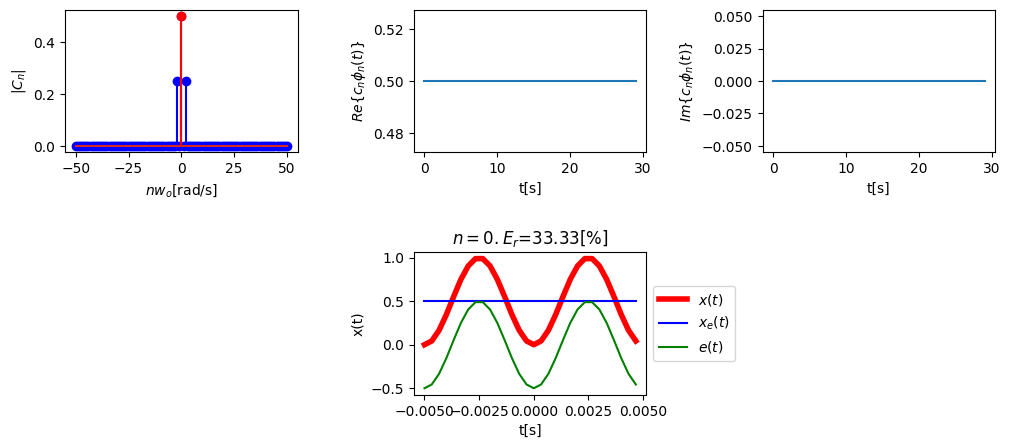

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3*(A**4))/8
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = (phin[:,ind]).dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- ((np.sum(abs(Cn[ind])**2))/Px)
    #señal reconstruida
    xe = (phin[:,ind]).dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)


#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')


anim




---



## Pregunta #3

Sea la señal portadora $c(t) = A_c \sin (2 \pi F_c t)$, con $A_c, F_c \in \mathbb{R}$, y la señal mensaje $m(t) \in \mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = (1 + \frac{m(t)}{A_c}) \ c(t)$. Luego, descargue desde YouTube 5 segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación  por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.

_Nota: se sugiere utilizar un canal de señal de audio para el desarrollo de la pregunta. El usuario debe poder escoger el indice de modulación deseado._


---

###**Solución espectro en frecuencia:**

El desarrollo de la solución del espectro en frecuencia de la señal modulada en amplitud (AM), puede ser consultado en el siguiente enlace:

[Cálculos espectro en frecuencia de la señal modulada](https://github.com/juacardonahe/NotebooksS_S/tree/main/Parciales)

---

###**Simulación modulación**


In [ ]:
#Se puede usar la API youtube-dl para descargar un video de youtube y extraer el audio en formato mp3.
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.7 MB 8.7 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.7 MB/s eta 0:00:00
Using cached charset_

In [ ]:
#Se debe incluir el enlace del video a procesar
link="https://www.youtube.com/watch?v=DU5fiwedSCk"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=DU5fiwedSCk
[youtube] DU5fiwedSCk: Downloading webpage
[youtube] DU5fiwedSCk: Downloading ios player API JSON
[youtube] DU5fiwedSCk: Downloading web creator player API JSON
[youtube] DU5fiwedSCk: Downloading player 3abab6ef
[youtube] DU5fiwedSCk: Downloading m3u8 information
[info] DU5fiwedSCk: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.83MiB in 00:00:00 at 8.19MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [ ]:
#Se convierte a formato WAV para permitir el procesamiento
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#Libreria para manipulación de archivos de audio
!pip install soundfile

In [ ]:
import numpy as np
import soundfile as sf # para instalar pip install soundfile

#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

if x.ndim > 1:
    x = np.mean(x, axis=1)

# Extraer los 5 segundos desde los 20 a los 25 segundos
start_sample = int(20 * fs)
end_sample = int(25 * fs)
x_fragment = x[start_sample:end_sample]


# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
#Reproducir el fragmento seleccionado
from IPython.display import Audio
Audio(x_fragment, rate=fs)

In [ ]:
import matplotlib.pyplot as plt

#parámetros de la portadora
Fc = 10000  #frecuencia de la portadora
Im = float(input("Ingrese el índice de modulación: ")) #Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Fs = 5 * Fc

t = np.arange(len(x_fragment)) / fs #vector del tiempo

m = x_fragment / np.max(np.abs(x_fragment)) #normalizar el fragmento de audio -> Mensaje

Ac = np.max(np.abs(m)) / Im #amplitud de la portadora según índice de modulación
c = Ac * np.sin(2 * np.pi * Fc * t)  #portadora

print(Ac)

Ingrese el índice de modulación: 0.8
1.25





---



###**Gráficas en tiempo y frecuencia**

- Se grafican las señales mensaje y portadora:

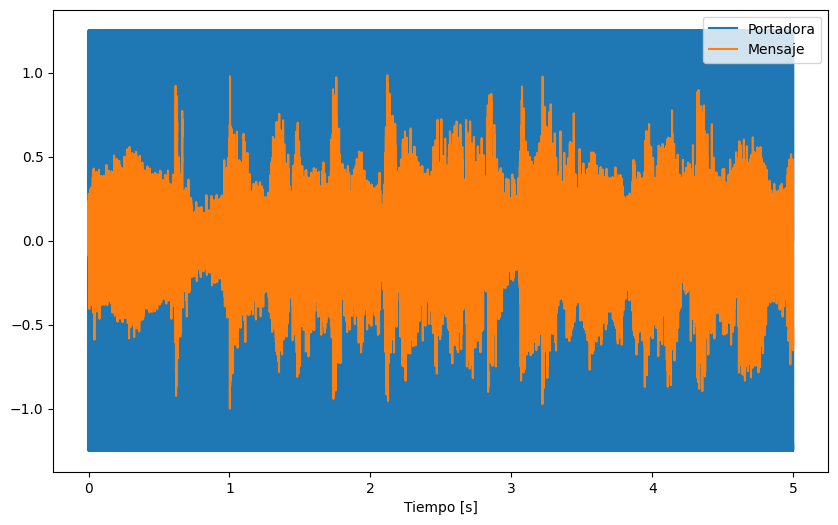

In [ ]:
# Graficar la señal portadora y el mensaje
plt.figure(figsize=(10, 6))
plt.plot(t, c, label='Portadora')
plt.plot(t, m, label='Mensaje')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.show()

- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

In [ ]:
# Señal modulada en AM
y = (1 + m / Ac) * c

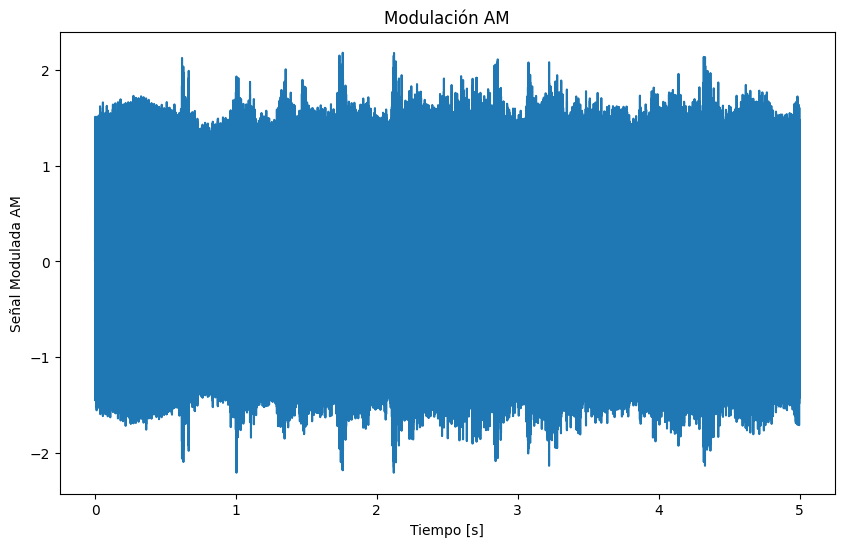

In [ ]:
# Graficar la señal modulada
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.xlabel('Tiempo [s]')
plt.ylabel('Señal Modulada AM')
plt.title('Modulación AM')
plt.show()

- A continuación, se presenta el espectro de la señal mensaje, portadora y modulada.

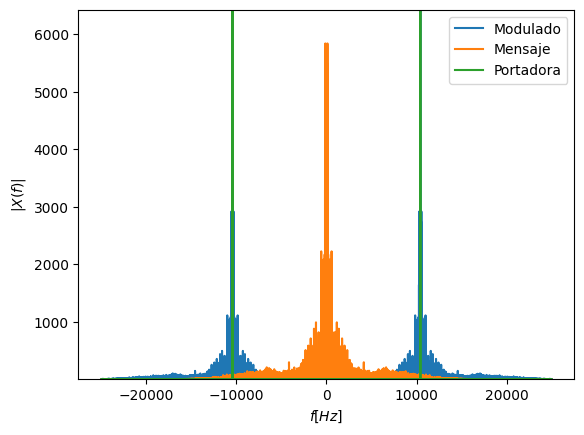

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='Modulado')
plt.plot(vfre,abs(Xfm),label='Mensaje')
plt.plot(vfre,abs(Xfc),label='Portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()




---



###**Fragmentos de audio**

In [ ]:
#Reproducir la señal mensaje
print("Señal mensaje")
Audio(x_fragment, rate=fs)

Señal mensaje


In [ ]:
#Reproducir la señal portadora
print("Señal portadora")
Audio(c, rate=fs)

Señal portadora


In [ ]:
#Reproducir la señal modulada
print("Señal modulada")
Audio(y, rate=fs)

Señal modulada





---



##Pregunta #4

Consulte en qué consiste la distorsión total de armónicos (_Total Harmonic Distortion_ (THD)) y el factor de potencia en un circuito eléctrico.

¿Cómo puede calcularse el THD desde la FFT?, ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?.

Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga:



1.   Netamente resistiva
2.   Carga RC en serie

Establezca las condiciones necesarias para las simulaciones. El usuario podrá escoger diferentes valores de R y C.

Discuta los resultados obtenidos.




---



###**Solución consulta:**


**1. ¿En qué consiste la distorsión total de armónicos (_Total Harmonic Distortion_ (THD))?**

R: Se define la distorsión armónica total como la suma de las contribuciones a la distorsión de cada armónico. Sin embargo no se puede definir como una suma algebraica directa, debido a que los coeficientes de la serie de Fourier pueden ser positivos o negativos.


**2. ¿En qué consiste el factor de potencia de un circuito eléctrico?**

R: El factor de potencia (FP) es una medida que indica qué tan eficientemente un circuito eléctrico utiliza la energía. Se define como el cociente entre la potencia activa (real), que realiza trabajo útil, y la potencia aparente, que es la combinación de la potencia activa y la reactiva (la que circula entre los elementos reactivos sin realizar trabajo). Matemáticamente, se expresa como:

$$FP = \cos(\theta)$$

donde $\theta$ es el ángulo de desfase entre la tensión y la corriente. Un factor de potencia cercano a 1 significa que la energía se usa de manera eficiente, mientras que un valor bajo indica la presencia de potencia reactiva, que no contribuye al trabajo útil pero aumenta las pérdidas en el sistema.


**3. ¿Cómo puede calcularse el THD desde la FFT?**

R: Primero se debe de calcular la FFT de la señal y obtener las magnitudes (o valores RMS) correspondientes a las diferentes frecuencias, luego se deben identificar el $V_1$ que corresponde a la magnitud de la frecuencia fundamental, y los $V_2,V_3,\ ... \ ,V_n$ que corresponden a las magnitudes de los armónicos superiores, estos armónicos superiores son multiplos enteros de la frecuencia fundamental.

Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la distorsión total de armónicos (THD) según:

$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$


**4. ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?**

R: La medida de distorsión del factor de potencia se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

---

###**Simulaciones:**

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X

####**1. Carga netamente resistiva**

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

#####Función de transferencia

In [ ]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X
Y

X(s)

#####Fijar valores de parámetros para simulación

In [ ]:
R_v = input("Ingrese el valor de R: ") #valores de simulacion de R

Y_RC = Y.subs(R, R_v)
Y_RC

Ingrese el valor de R: 1000


X(s)

######Función de transferencia en scipy

- Se resuelve la función de transferencia y se pasa al paquete scipy para trabajar con la aproximación numérica de la entrada, en este caso la función senoidal rectificada

In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[1]


#####Evaluar el sistema ante entrada de interés y obtener salida en arreglo numpy

In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = abs(A*(np.sin(2*np.pi*Fo*t)))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_o, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

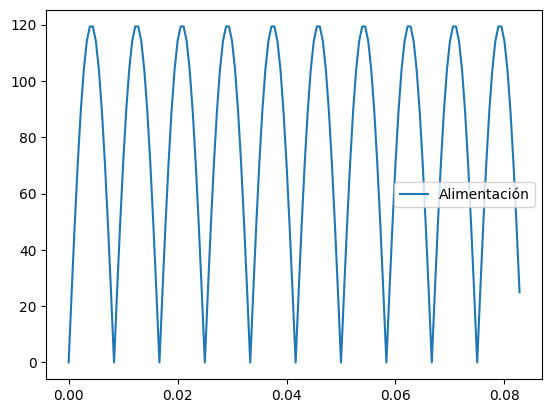

In [ ]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

#####Gráfica de la entrada rectificada y la salida del circuito

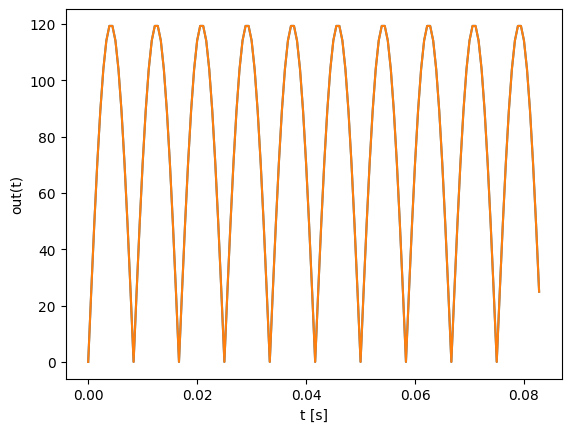

In [ ]:
plt.plot(t, in_o,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

#####Cálculo del espectro con fft

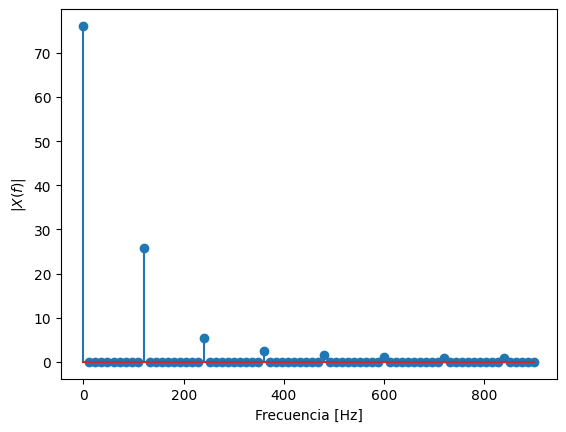

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out) #Fourier de la salida

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

#####Cálculo de la distorsión total de armónicos - THD y Distorsión del factor de potencia - DFP

In [ ]:
V1 = np.abs(Xf[1])  # Componente fundamental (frecuencia 60 Hz)
Vn = np.sqrt(np.sum(np.abs(Xf[2:])**2))  # Suma de los armónicos superiores
THD = Vn / V1  # Cálculo del THD

DFP = np.sqrt((1/(1+(THD**2))))

print("DFP: ", DFP)

# Mostrar el resultado del THD
print(f'THD: {THD * 100:.2f}%')

DFP:  5.85428264148113e-16
THD: 170815121380439616.00%


Cuando una señal tiene componentes no senoidales (como la rectificación de la señal), se generan armónicos adicionales que no están presentes en una onda senoidal pura. Esto es lo que está aumentando el THD, no el comportamiento de la carga resistiva.

####**2. Carga RC serie**

#####Función de transferencia

In [ ]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

#####Fijar valores de parámetros para simulación

In [ ]:
R_v = float(input("Ingrese el valor de R: ")) #valores de simulacion de R
C_v = float(input("Ingrese el valor de C (por ejemplo 10e-6): "))

Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

Ingrese el valor de R: 1000
Ingrese el valor de C (por ejemplo 10e-6): 10e-6


X(s)/(0.01*s + 1)

######Función de transferencia en scipy

- Se resuelve la función de transferencia y se pasa al paquete scipy para trabajar con la aproximación numérica de la entrada, en este caso la función senoidal rectificada

In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


#####Evaluar el sistema ante entrada de interés y obtener salida en arreglo numpy

In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = abs(A*(np.sin(2*np.pi*Fo*t)))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_o, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

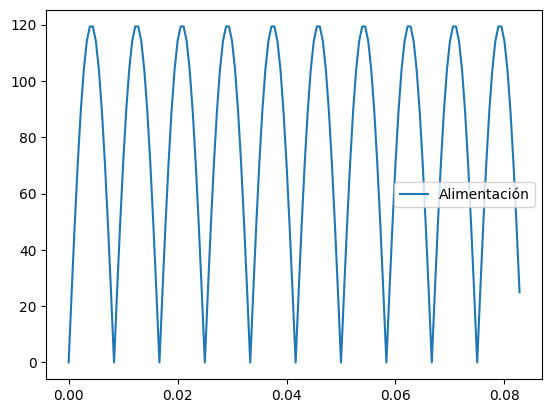

In [ ]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

#####Gráfica de la entrada rectificada y la salida del circuito

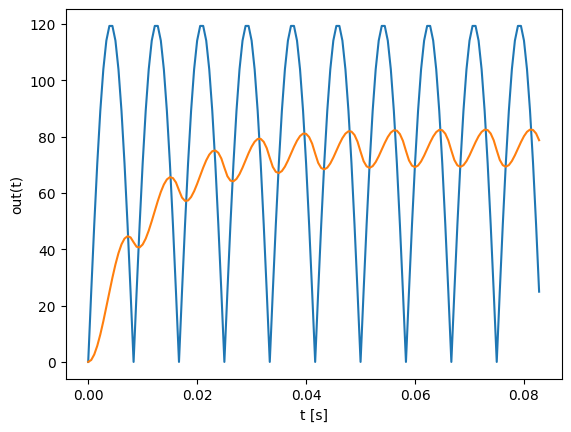

In [ ]:
plt.plot(t, in_o,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

#####Cálculo del espectro con fft

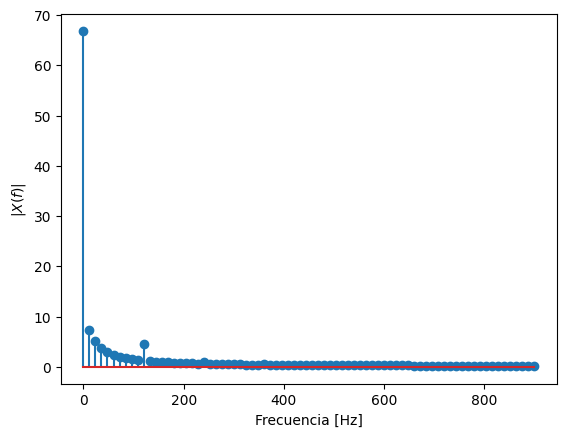

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out) #Fourier de la salida

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

#####Cálculo de la distorsión total de armónicos - THD y Distorsión del factor de potencia - DFP

In [ ]:
V1 = np.abs(Xf[1])  # Componente fundamental (frecuencia 60 Hz)
Vn = np.sqrt(np.sum(np.abs(Xf[2:])**2))  # Suma de los armónicos superiores
THD = Vn / V1  # Cálculo del THD

DFP = np.sqrt((1/(1+(THD**2))))

print("DFP: ", DFP)

# Mostrar el resultado del THD
print(f'THD: {THD * 100:.2f}%')

DFP:  0.5929116215039585
THD: 135.82%


El hecho de que el THD sea más bajo en el caso de la carga RC en serie, a pesar de estar alimentando el sistema con la misma señal senoidal rectificada, se debe a que el condensador introduce un efecto de filtrado en la señal.

Un circuito RC en serie actúa como un filtro pasa-bajas, lo que significa que atenúa las frecuencias altas (armónicos superiores) de la señal de entrada. En el caso de una señal senoidal rectificada, los armónicos generados por la rectificación tienden a ser de frecuencias más altas que la componente fundamental.